# Graphing #elxn43 users

We're using a Jupyter Notebook via the [Anaconda distribution](https://www.anaconda.com/), and we'll need to only import the following:

In [1]:
import re
import pandas as pd

We'll create a DataFrame to work with from `elxn43-users.txt`. This file is a derivative of the [#elxn43 dataset](https://doi.org/10.5683/SP2/QAMPPI). It can be created with the [`users.py`](https://github.com/DocNow/twarc/blob/master/utils/users.py):

```
$ python twarc/utils/users.py elxn43_search.jsonl > elxn43-users.txt
```

It is also included in the repo in the `data` directory.

This `users.py` script outputs the data in the format: `"%s [%s]"` (`user name`, `[user handle]`). So, we have lines that look like this:

```
CSUnited [CSUnited2014]
yogaFlo [yogaFlo]
Scott Costen [ScottCosten]
Rosa Taggart 🇨🇦🇮🇹🐀 [RosaTaggart]
Skylar Walsh [weirdoveganimal]
judyrebick [judyrebick]
LndOntRetweets [LndOntRetweets]
Bob Neufeld [BobNeufer]
Mr. Nick [LAKUnamatata]
Holly Skaptason Dreger 🇨🇦   🇮🇸 [YoeysAmma]
```

We can load these in as single column, and split them into two columns later.


In [2]:
elxn43_users = pd.read_csv(
    "data/elxn43-users.txt",
    names=["username-handle"],
    header=None,
    encoding='utf8',
)

Let's take a look at the DataFrame:

In [3]:
elxn43_users

,username-handle
0,CSUnited [CSUnited2014]
1,yogaFlo [yogaFlo]
2,Scott Costen [ScottCosten]
3,Rosa Taggart 🇨🇦🇮🇹🐀 [RosaTaggart]
4,Skylar Walsh [weirdoveganimal]
5,judyrebick [judyrebick]
6,LndOntRetweets [LndOntRetweets]
7,Bob Neufeld [BobNeufer]
8,Mr. Nick [LAKUnamatata]
9,Holly Skaptason Dreger 🇨🇦 🇮🇸 [YoeysAmma]


Now let's split `username-handle` into separate columns using a regualr expression that extracts the value between the brackets.

In [4]:
elxn43_users['handle'] = elxn43_users['username-handle'].str.extract('\[(.*?)\]', expand=True)

Let's look at the DataFrame again to see our new column.

In [5]:
elxn43_users

,username-handle,handle
0,CSUnited [CSUnited2014],CSUnited2014
1,yogaFlo [yogaFlo],yogaFlo
2,Scott Costen [ScottCosten],ScottCosten
3,Rosa Taggart 🇨🇦🇮🇹🐀 [RosaTaggart],RosaTaggart
4,Skylar Walsh [weirdoveganimal],weirdoveganimal
5,judyrebick [judyrebick],judyrebick
6,LndOntRetweets [LndOntRetweets],LndOntRetweets
7,Bob Neufeld [BobNeufer],BobNeufer
8,Mr. Nick [LAKUnamatata],LAKUnamatata
9,Holly Skaptason Dreger 🇨🇦 🇮🇸 [YoeysAmma],YoeysAmma


Now that we have the Twitter handle, let's find out who the most profilic Tweeters are for #elxn43. The `value_counts()` method comes in handy here.

In [6]:
top_tweeters = elxn43_users['handle'].value_counts().head(20)
top_tweeters

johangreg          6319
joanvw09           5705
BriApp             5286
Ez4u2say_Janis     4455
Sunnydays180       4430
gail_sloane        4368
Ken95645317        4243
JoanneCangal       4125
OntarioTreeFrog    3530
RayburnBev         3388
choosemuskoka      3130
KSP_Libs           3042
Learning2GetBy     3022
NanceDee           2992
allthecdnpoli      2978
janbear105         2863
canukcookie        2739
HopeAldridge       2645
mini_bubbly        2630
suepeac            2526
Name: handle, dtype: int64

Now let's plot them!

Let's also do a colour gradient for the bars to get some color separation.

Here we'll create the chart, then add a title, and labels.

Text(0, 0.5, 'Count')

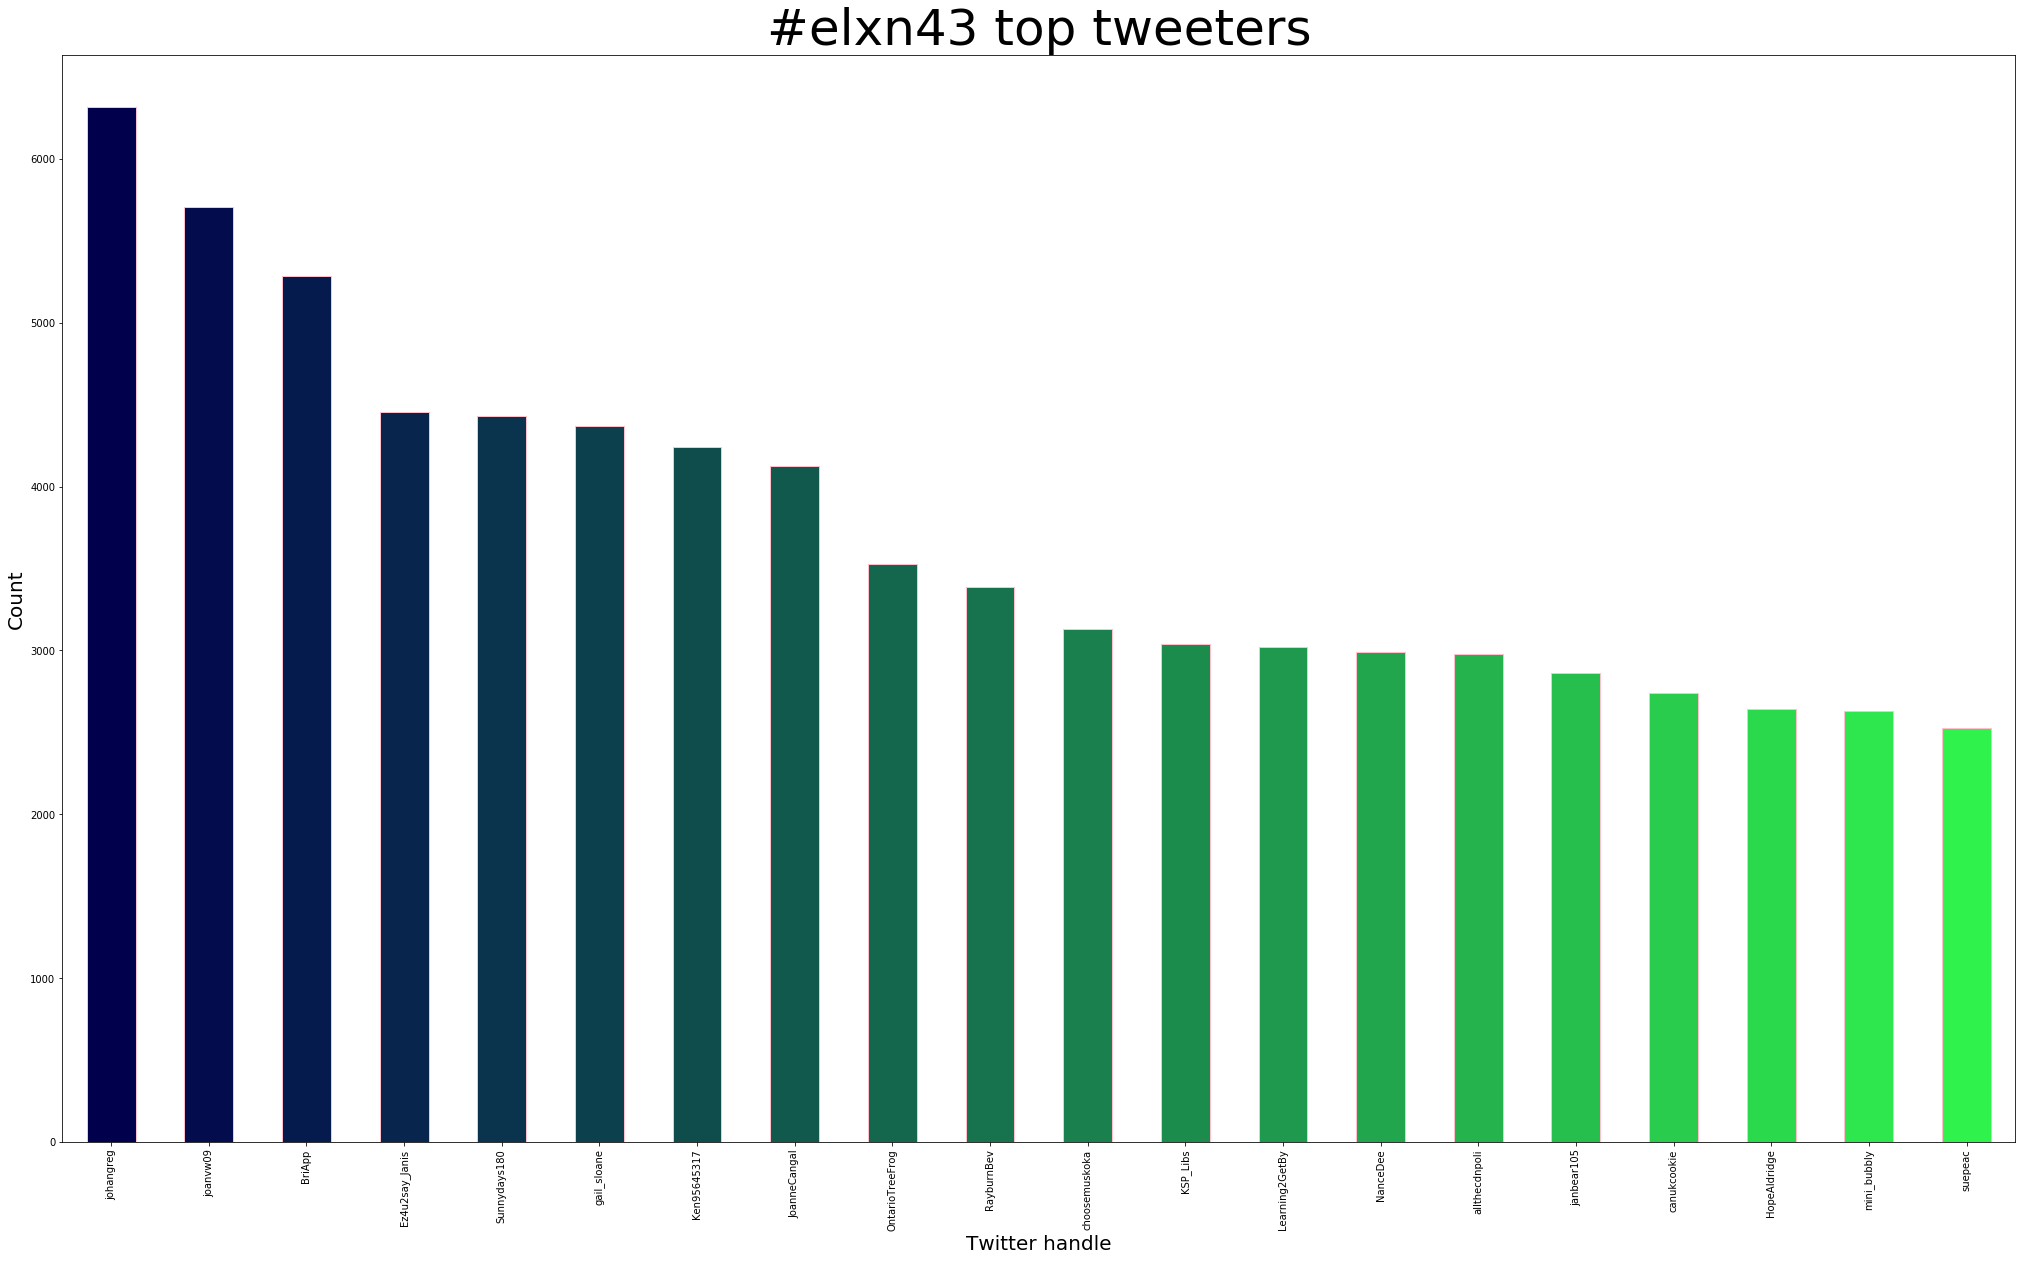

In [8]:
colours = [(x / 100.0, x / 20.0, 0.30) for x in range(len(top_tweeters))]

chart = top_tweeters.plot.bar(
    color=colours,
    figsize=(35, 20),
    legend=False,
    edgecolor="pink",
)

chart.set_title("#elxn43 top tweeters", fontsize=50)
chart.set_xlabel("Twitter handle", fontsize=20)
chart.set_ylabel("Count", fontsize=20)